<div align=center><h3>Goal Number 6</h3></div>
<div align=center>Within this Notebook I will be exploring the distribution and opinion of developers regarding a word,<br> or file extension, known to millions of people the world over, GIF. The objective here is to quantify,<br> using the records given in the Stack Overflow survey, from which this project draws it's dataset <br>(available @ : <a href="https://insights.stackoverflow.com/survey/">Stack Overflow Developer Survey</a>), the consensus of pronunciation of the word GIF<br> by the programming population active on Stack Overflow. After initial steps to assess the general<br> pronunciation of the word by developers globally, the search shall be refined to investigate if there<br> is any correlation between a developer's pronunciation of the word, and several other aspects of<br> the survey. These will include aspects such as the potential influence of their preference for<br> loud, clicky keyboards, and their enjoyment of debugging</div>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas.plotting import scatter_matrix

import plotly as pltly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot, init_notebook_mode
#init_notebook_mode(connected=True)
import pycountry

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

pltly.tools.set_credentials_file(username='JakeMurphDS1718', api_key='VzF5mDLdeJvs2Jt9e1yR')
%matplotlib inline 

surveyAnswers = pd.read_csv('C:/Users/jakem/Desktop/Data_Sets/survey_results_public.csv')

In [2]:
worldMap = {country.name: country.alpha3 for country in pycountry.countries}
worldMapDataList = []

for country in worldMap:
    worldMapData = {'Country': country, 'Code': worldMap[country], 'Total': (surveyAnswers.Country == country).sum(), 
                  'With a hard "g"' : str(len(surveyAnswers[(surveyAnswers['Country']== country) & (surveyAnswers['PronounceGIF']=='With a hard "g," like "gift"')])),
                  'With a soft "g"': str(len(surveyAnswers[(surveyAnswers['Country']== country) & (surveyAnswers['PronounceGIF']=='With a soft "g," like "jiff"')])),
                  'Enunciating each letter' : str(len(surveyAnswers[(surveyAnswers['Country']== country) & (surveyAnswers['PronounceGIF']=='Enunciating each letter: "gee eye eff"')])),
                  'Some other way': str(len(surveyAnswers[(surveyAnswers['Country']== country) & (surveyAnswers['PronounceGIF']=='Some other way')])),
                  'NA': str(len(surveyAnswers[(surveyAnswers['Country']== country) & (surveyAnswers['PronounceGIF'].isnull())]))}
    worldMapDataList.append(worldMapData)
    
df = pd.DataFrame(worldMapDataList) # creating panda object

In [3]:
df['firstVersion'] = df['Country'] + "<br>Hard 'g' : " + df['With a hard "g"'] + "<br>Soft 'g' : " + df['With a soft "g"'] + "<br>Each letter : " + df['Enunciating each letter'] + "<br>Some other way : " + df['Some other way'] + "<br>Not dignifying it with an answer : " + df['NA'] 

data = [ dict(
        type = 'choropleth',
        locations = df['Code'],
        z = df['Total'],
        text = df['firstVersion'],
        colorscale = [[0,"rgb(0,100,0)"],[0.35,"rgb(34,139,34)"],[0.5,"rgb(50,205,50)"],\
            [0.6,"rgb(124,252,0)"],[0.7,"rgb(173,255,47)"],[1,"rgb(200,250,200)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Respondents<br>in Thousands'),
      ) ]

layout = dict(
    title = '2017 Stackoverflow Pronunciation of GIF<br>Dataset Available @ \
            <a href="https://insights.stackoverflow.com/survey/">\
            Stack Overflow Annual Developer Survey</a>',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False)

In [4]:
worldMapDataList2 = []
# preestablished country list
for country in worldMap:
    worldMapData2 = {'Country': country, 'Code': worldMap[country], 'Total': (surveyAnswers.Country == country).sum(), 
                  'With a hard "g"' : str(len(surveyAnswers[(surveyAnswers['Country']== country) & (surveyAnswers['PronounceGIF']=='With a hard "g," like "gift"') & (surveyAnswers['ClickyKeys']=='Yes')])),
                  'With a soft "g"': str(len(surveyAnswers[(surveyAnswers['Country']== country) & (surveyAnswers['PronounceGIF']=='With a soft "g," like "jiff"') & (surveyAnswers['ClickyKeys']=='Yes')])),
                  'Enunciating each letter' : str(len(surveyAnswers[(surveyAnswers['Country']== country) & (surveyAnswers['PronounceGIF']=='Enunciating each letter: "gee eye eff"') & (surveyAnswers['ClickyKeys']=='Yes')])),
                  'Some other way': str(len(surveyAnswers[(surveyAnswers['Country']== country) & (surveyAnswers['PronounceGIF']=='Some other way') & (surveyAnswers['ClickyKeys']=='Yes')])),
                  'NA': str(len(surveyAnswers[(surveyAnswers['Country']== country) & (surveyAnswers['PronounceGIF'].isnull()) & (surveyAnswers['ClickyKeys']=='Yes')]))}
    worldMapDataList2.append(worldMapData2)
    
df2 = pd.DataFrame(worldMapDataList2) # creating panda object

In [5]:
df2['secondVersion'] = df2['Country'] + "<br>Hard 'g' and Clicky Keys : " + df2['With a hard "g"'] + "<br>Soft 'g' and Clicky Keys : " + df2['With a soft "g"'] + "<br>Each letter and Clicky Keys : " + df2['Enunciating each letter'] + "<br>Some other way and Clicky Keys : " + df2['Some other way'] + "<br>Not dignifying it with an answer, but they still like Clicky Keys : " + df2['NA'] 

data2 = [ dict(
        type = 'choropleth',
        locations = df2['Code'],
        z = df2['Total'],
        text = df2['secondVersion'],
        colorscale = [[0,"rgb(0,100,0)"],[0.35,"rgb(34,139,34)"],[0.5,"rgb(50,205,50)"],\
            [0.6,"rgb(124,252,0)"],[0.7,"rgb(173,255,47)"],[1,"rgb(200,250,200)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Respondents<br>in Thousands'),
      ) ]

layout2 = dict(
    title = '2017 Stackoverflow Pronunciation of GIF and thoughts on Clicky Keyboards<br>Dataset Available @ \
            <a href="https://insights.stackoverflow.com/survey/">\
            Stack Overflow Annual Developer Survey</a>',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'mercator'
        )
    )
)

fig2 = dict( data=data2, layout=layout2 )
py.iplot( fig2, validate=False)

In [6]:
worldMapDataList3 = []
# preestablished country list
for country in worldMap:
    worldMapData3 = {'Country': country, 'Code': worldMap[country], 'Total': (surveyAnswers.Country == country).sum(), 
                  'With a hard "g"' : str(len(surveyAnswers[(surveyAnswers['Country']== country) & (surveyAnswers['PronounceGIF']=='With a hard "g," like "gift"') & (surveyAnswers['ClickyKeys']=='Yes') & ((surveyAnswers['EnjoyDebugging']=='Agree') | (surveyAnswers['EnjoyDebugging']=='Strongly Agree'))])),
                  'With a soft "g"': str(len(surveyAnswers[(surveyAnswers['Country']== country) & (surveyAnswers['PronounceGIF']=='With a soft "g," like "jiff"') & (surveyAnswers['ClickyKeys']=='Yes') & ((surveyAnswers['EnjoyDebugging']=='Agree') | (surveyAnswers['EnjoyDebugging']=='Strongly Agree'))])),
                  'Enunciating each letter' : str(len(surveyAnswers[(surveyAnswers['Country']== country) & (surveyAnswers['PronounceGIF']=='Enunciating each letter: "gee eye eff"') & (surveyAnswers['ClickyKeys']=='Yes') & ((surveyAnswers['EnjoyDebugging']=='Agree') | (surveyAnswers['EnjoyDebugging']=='Strongly Agree'))])),
                  'Some other way': str(len(surveyAnswers[(surveyAnswers['Country']== country) & (surveyAnswers['PronounceGIF']=='Some other way') & (surveyAnswers['ClickyKeys']=='Yes') & ((surveyAnswers['EnjoyDebugging']=='Agree') | (surveyAnswers['EnjoyDebugging']=='Strongly Agree'))])),
                  'NA': str(len(surveyAnswers[(surveyAnswers['Country']== country) & (surveyAnswers['PronounceGIF'].isnull()) & (surveyAnswers['ClickyKeys']=='Yes') & ((surveyAnswers['EnjoyDebugging']=='Agree') | (surveyAnswers['EnjoyDebugging']=='Strongly Agree'))]))}
    worldMapDataList3.append(worldMapData3)
    
df3 = pd.DataFrame(worldMapDataList3) # creating panda object

In [7]:
df3['thirdVersion'] = df3['Country'] + "<br>Despicable : " + df3['With a hard "g"'] + "<br>Scum : " + df3['With a soft "g"'] + "<br>Barely Human : " + df3['Enunciating each letter'] + "<br>Are Monsters : " + df3['Some other way'] + "<br>Not dignifying it with an answer, like Clicky Keys and Debugging : " + df3['NA'] 

data3 = [ dict(
        type = 'choropleth',
        locations = df3['Code'],
        z = df3['Total'],
        text = df3['thirdVersion'],
        colorscale = [[0,"rgb(0,100,0)"],[0.35,"rgb(34,139,34)"],[0.5,"rgb(50,205,50)"],\
            [0.6,"rgb(124,252,0)"],[0.7,"rgb(173,255,47)"],[1,"rgb(200,250,200)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Respondents<br>in Thousands'),
      ) ]

layout3 = dict(
    title = '2017 Stackoverflow Pronunciation of GIF, thoughts on Clicky Keyboards and Debugging<br>Dataset Available @ \
            <a href="https://insights.stackoverflow.com/survey/">\
            Stack Overflow Annual Developer Survey</a>',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'mercator'
        )
    )
)

fig3 = dict( data=data3, layout=layout3 )
py.iplot( fig3, validate=False)

In [8]:
#type(surveyAnswers['PronounceGIF'])
### very difficult clean up to figure out, 2 hours for something so small
#cleaning up the answers data for the linear regression algorithm
surveyAnswers['PronounceGIF'] = surveyAnswers['PronounceGIF'].replace('With a soft "g," like "jiff"', 4)
surveyAnswers['PronounceGIF'] = surveyAnswers['PronounceGIF'].replace('With a hard "g," like "gift"', 3)
surveyAnswers['PronounceGIF'] = surveyAnswers['PronounceGIF'].replace('Enunciating each letter: "gee eye eff"', 2)
surveyAnswers['PronounceGIF'] = surveyAnswers['PronounceGIF'].replace('Some other way', 1)
surveyAnswers = surveyAnswers[surveyAnswers.PronounceGIF.notnull()]

surveyAnswers['ClickyKeys'] = surveyAnswers['ClickyKeys'].replace('Yes', 2)
surveyAnswers['ClickyKeys'] = surveyAnswers['ClickyKeys'].replace('No', 1)
surveyAnswers = surveyAnswers[surveyAnswers.ClickyKeys.notnull()]

#print(surveyAnswers['ClickyKeys'])
#print(surveyAnswers['PronounceGIF'])

#df = df[df.line_race.notnull()]

#X = surveyAnswers['ClickyKeys'].values[:,np.newaxis]
X = surveyAnswers['PronounceGIF'].values[:,np.newaxis]

#y = surveyAnswers['PronounceGIF'].values
y = surveyAnswers['ClickyKeys'].values

model = LinearRegression()

model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

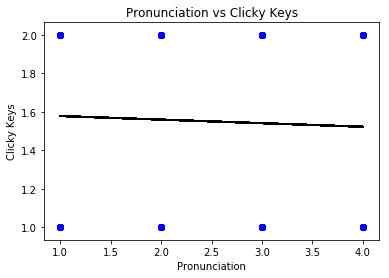

In [9]:
plt.scatter(X, y,color='b')

plt.title('Pronunciation vs Clicky Keys')  
plt.xlabel('Pronunciation')  
plt.ylabel('Clicky Keys')

plt.plot(X, model.predict(X),color='k')

plt.show()

<div><h3>Pronunciation of GIF vs Like of Clicky Keys</h3></div>
<div>While there is very little to non-existent significant correlation between these two variables according to the above graph, to does show a certain trend. While not strongly influential, the graph does present the notion that the more correct a person's pronunciation of the word GIF, the more likely it is that they also dislike noisy keyboards, as one should.</div>

In [10]:
surveyAnswers['EnjoyDebugging'] = surveyAnswers['EnjoyDebugging'].replace('Strongly agree', 5)
surveyAnswers['EnjoyDebugging'] = surveyAnswers['EnjoyDebugging'].replace('Agree', 4)
surveyAnswers['EnjoyDebugging'] = surveyAnswers['EnjoyDebugging'].replace('Somewhat agree', 3)
surveyAnswers['EnjoyDebugging'] = surveyAnswers['EnjoyDebugging'].replace('Disagree', 2)
surveyAnswers['EnjoyDebugging'] = surveyAnswers['EnjoyDebugging'].replace('Strongly disagree', 1)
surveyAnswers = surveyAnswers[surveyAnswers.EnjoyDebugging.notnull()]

#print(surveyAnswers['EnjoyDebugging'])

In [11]:
X = surveyAnswers['EnjoyDebugging'].values[:,np.newaxis]

y = surveyAnswers['PronounceGIF'].values

model = LinearRegression()

model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

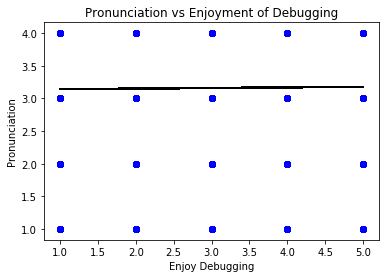

In [12]:
plt.scatter(X, y,color='b')

plt.title('Pronunciation vs Enjoyment of Debugging')  
plt.xlabel('Enjoy Debugging')  
plt.ylabel('Pronunciation')

plt.plot(X, model.predict(X),color='k')

plt.show()

<div><h3>Pronounciation of GIF vs Enjoying Debugging</h3></div>
<div>Similar to the previous linear regression graph, it can be seen that there is little to no correlation between a developer's pronunciation of GIF, and their affinity for debugging. A point that can be noted about the information provided by the graph, however, is the fact that the majority of survey respondents who indicated that they enjoy debugging, are also those same people who would pronounce GIF with a hard "g", much like the Serbian word глупо(glupo), meaning stupid, dumb, silly, dull, dense, obtuse or crack-brained, much like said respondents.</div>

In [13]:
surveyAnswers = surveyAnswers[surveyAnswers.Salary.notnull()]

X = surveyAnswers['PronounceGIF'].values[:,np.newaxis]

y = surveyAnswers['Salary'].values

model = LinearRegression()

model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

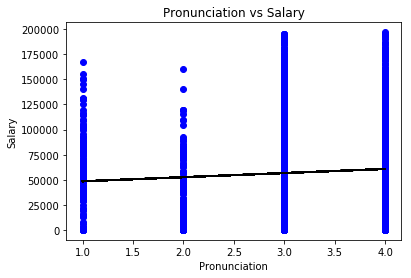

In [14]:
plt.scatter(X, y,color='b')
plt.title('Pronunciation vs Salary')  
plt.xlabel('Pronunciation')  
plt.ylabel('Salary') 

plt.plot(X, model.predict(X),color='k')

plt.show()

<div><h3>Pronounciation of GIF vs Salary</h3></div>
<div>It can be seen in the diagram above that there is a weak, but existing correlation between a developer's pronunciation of the word 'GIF' and the salary level they may achieve in their workplace. This may be due to their work ethic, and ability, or desire to stick to a defined standard, and the resultant teamwork and elegant code that would fit happily into a business's existing codebase. Whatever the actual contextual reasoning behind this correlation is, it results in a deviation of salary of almost \\$10,000 globally, and approximately $2500 between pronunciation with a hard 'g' and with a soft 'g'.</div>

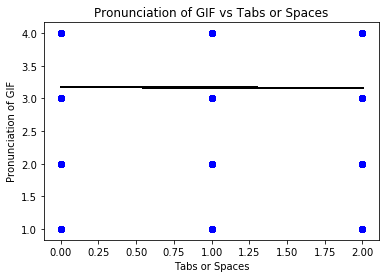

In [15]:
surveyAnswers["TabsSpaces"] = surveyAnswers["TabsSpaces"].replace('Tabs', 0)
surveyAnswers["TabsSpaces"] = surveyAnswers["TabsSpaces"].replace('Spaces', 1)
surveyAnswers["TabsSpaces"] = surveyAnswers["TabsSpaces"].replace('Both', 2)

surveyAnswers = surveyAnswers[surveyAnswers.TabsSpaces.notnull()]

X = surveyAnswers['TabsSpaces'].values[:,np.newaxis]
#y = CareerSatisfaction
y = surveyAnswers['PronounceGIF'].values

model = LinearRegression()

model.fit(X, y)

plt.scatter(X, y,color='b')

plt.plot(X, model.predict(X),color='k')

plt.title('Pronunciation of GIF vs Tabs or Spaces')  
plt.xlabel('Tabs or Spaces')  
plt.ylabel('Pronunciation of GIF')

plt.show()

<div><h3>Pronounciation of GIF vs Tabs or Spaces</h3></div>
<div>It can be seen in the diagram above that while there is a weak to non-existent positive or negative correlation between the pronunciation of the word GIF and that individual's preference of tabs or spaces, it can be noted from the location of the predictive line within the graph that it is heavily weighted towards those who pronounce GIF with a hard 'g' are the ones most likely to actually provide such a question with an answer. This may be owed to their neglect as a child, or some other deep-seated psychopathic tendency, or simply because they're actually willing to provide an answer for the survey...</div>

In [16]:
surveyAnswers['EducationImportant'] = surveyAnswers['EducationImportant'].replace('Very important', 5)
surveyAnswers['EducationImportant'] = surveyAnswers['EducationImportant'].replace('Important', 4)
surveyAnswers['EducationImportant'] = surveyAnswers['EducationImportant'].replace('Somewhat important', 3)
surveyAnswers['EducationImportant'] = surveyAnswers['EducationImportant'].replace('Not very important', 2)
surveyAnswers['EducationImportant'] = surveyAnswers['EducationImportant'].replace('Not at all important', 1)
surveyAnswers = surveyAnswers[surveyAnswers.EducationImportant.notnull()]

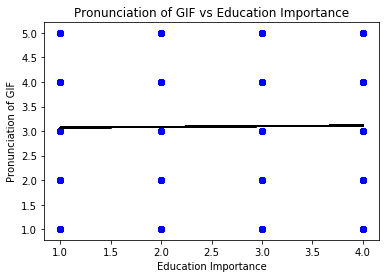

In [17]:
X = surveyAnswers['PronounceGIF'].values[:,np.newaxis]
#y = CareerSatisfaction
y = surveyAnswers['EducationImportant'].values

model = LinearRegression()

model.fit(X, y)

plt.scatter(X, y,color='b')

plt.plot(X, model.predict(X),color='k')

plt.title('Pronunciation of GIF vs Education Importance')  
plt.xlabel('Education Importance')  
plt.ylabel('Pronunciation of GIF')

plt.show()

<div><h3>Pronounciation of GIF vs Education Importance</h3></div>
<div>It can be seen in the diagram above that while there is, once again a quite weak correlation within this comparison, it can be noted once again that the weighting lies heavier with those who pronounce GIF with a hard 'g'. This shows that, while obviously an assumption, those who pronounce GIF with a hard 'g' are more likely to provide answers to questions that are not quite as serious as those concerning salary or career satisfaction, most likely due to the trivial nature of these more casual rapidfire questions.
The result of this linear regression test is also that it appears there is a general consensus that in all pronunciations of GIF, the programming populace only believe a formal education in the programming world to be only somewhat important.</div>